In [1]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

In [3]:
project_root

'C:\\Users\\phatl\\OneDrive - VNU-HCMUS\\Desktop\\TransUNet_Segmentation_In_Medical_Image'

In [4]:
def check_training_shapes(train_dir):
    train_files = sorted([f for f in os.listdir(train_dir) if f.endswith('.npz')])
    print("Đang kiểm tra các file training (số files: {}):".format(len(train_files)))
    for f in train_files:
        file_path = os.path.join(train_dir, f)
        data = np.load(file_path)
        image = data['image']
        label = data['label']
        print(f"File: {f} => Image shape: {image.shape}, Label shape: {label.shape}")

In [5]:
def check_testing_shapes(test_dir):
    test_files = sorted([f for f in os.listdir(test_dir) if f.endswith('.npy.h5')])
    print("Đang kiểm tra các file testing (số files: {}):".format(len(test_files)))
    for f in test_files:
        file_path = os.path.join(test_dir, f)
        with h5py.File(file_path, "r") as hf:
            image = hf['image'][:]
        print (f"File: {f} => Voulume shape: {image.shape}")

In [6]:
processed_train_dir = os.path.join(project_root, "data_test", "synapse", "train")
processed_test_dir = os.path.join(project_root, "data_test", "synapse", "test")

In [7]:
print("=== Kiểm tra shape của tập TRAINING ===")
check_training_shapes(processed_train_dir)

=== Kiểm tra shape của tập TRAINING ===
Đang kiểm tra các file training (số files: 2211):
File: case0005_slice000.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice001.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice002.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice003.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice004.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice005.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice006.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice007.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice008.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice009.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice010.npz => Image shape: (512, 512), Label shape: (512, 512)
File: case0005_slice011.npz =>

In [32]:
import re

def analyze_training_dataset(train_dir):
    # Lấy danh sách file .npz trong thư mục training
    train_files = sorted([f for f in os.listdir(train_dir) if f.endswith('.npz')])
    print(f"Đang kiểm tra các file training (số files: {len(train_files)})")

    # Dictionary để lưu số slices cho mỗi ca
    case_slice_counts = {}

    # Sử dụng regex để trích xuất case ID từ tên file, ví dụ: "case0040" từ "case0040_slice156.npz"
    pattern = r'(case\d+)_slice\d+\.npz'

    for f in train_files:
        match = re.match(pattern, f)
        if match:
            case_id = match.group(1)
            # Tăng count cho case
            if case_id in case_slice_counts:
                case_slice_counts[case_id] += 1
            else:
                case_slice_counts[case_id] = 1
        else:
            print(f"Không nhận dạng được case từ file: {f}")

    # Tính toán thống kê
    slices_per_case = list(case_slice_counts.values())
    num_cases = len(slices_per_case)
    min_slices = np.min(slices_per_case)
    max_slices = np.max(slices_per_case)
    mean_slices = np.mean(slices_per_case)
    std_slices = np.std(slices_per_case)

    print("Training Set Statistics:")
    print(f"Total cases: {num_cases}")
    print(f"Minimum slices per case: {min_slices}")
    print(f"Maximum slices per case: {max_slices}")
    print(f"Average number of slices per case: {mean_slices:.2f} ± {std_slices:.2f}")

    # Vẽ histogram phân bố số slices per case
    plt.figure(figsize=(8, 4))
    plt.hist(slices_per_case, bins=10, color="skyblue", edgecolor="black", alpha=0.7)
    plt.xlabel("Number of Slices per Case")
    plt.ylabel("Number of Cases")
    plt.title("Distribution of Slice Counts per Case in Training Set")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Định dạng trục y thành số nguyên
    import matplotlib.ticker as mtick
    plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

    plt.show()

    return case_slice_counts

Đang kiểm tra các file training (số files: 2211)
Training Set Statistics:
Total cases: 18
Minimum slices per case: 88
Maximum slices per case: 195
Average number of slices per case: 122.83 ± 30.01


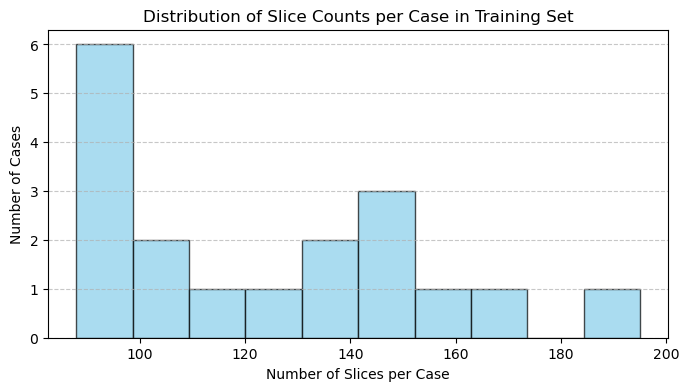

In [33]:
case_counts = analyze_training_dataset(processed_train_dir)

In [8]:
print("\n=== Kiểm tra shape của tập TESTING ===")
check_testing_shapes(processed_test_dir)


=== Kiểm tra shape của tập TESTING ===
Đang kiểm tra các file testing (số files: 12):
File: case0001.npy.h5 => Voulume shape: (147, 512, 512)
File: case0002.npy.h5 => Voulume shape: (139, 512, 512)
File: case0003.npy.h5 => Voulume shape: (198, 512, 512)
File: case0004.npy.h5 => Voulume shape: (140, 512, 512)
File: case0008.npy.h5 => Voulume shape: (148, 512, 512)
File: case0022.npy.h5 => Voulume shape: (89, 512, 512)
File: case0025.npy.h5 => Voulume shape: (85, 512, 512)
File: case0029.npy.h5 => Voulume shape: (100, 512, 512)
File: case0032.npy.h5 => Voulume shape: (144, 512, 512)
File: case0035.npy.h5 => Voulume shape: (94, 512, 512)
File: case0036.npy.h5 => Voulume shape: (184, 512, 512)
File: case0038.npy.h5 => Voulume shape: (100, 512, 512)


In [30]:
def analyze_test_shapes(test_folder):
    file_shapes = {}  # Store the shape of each file
    num_slices_list = []  # Store the number of slices for each file

    # Iterate over all files in the test folder
    for filename in sorted(os.listdir(test_folder)):
        if filename.endswith(".h5"):  # Process only .h5 files
            file_path = os.path.join(test_folder, filename)
            with h5py.File(file_path, 'r') as hf:
                shape = hf['image'].shape  # Expected shape: (Depth, Height, Width)
                file_shapes[filename] = shape
                num_slices_list.append(shape[0])  # Store the number of slices (Depth)

    # Compute statistics
    num_files = len(num_slices_list)
    min_slices = min(num_slices_list)
    max_slices = max(num_slices_list)
    mean_slices = np.mean(num_slices_list)
    std_slices = np.std(num_slices_list)

    # Print summary statistics
    print(f"Test Set Statistics:")
    print(f"Total files: {num_files}")
    print(f"Minimum slices (Depth): {min_slices}")
    print(f"Maximum slices (Depth): {max_slices}")
    print(f"Average number of slices: {mean_slices:.2f} ± {std_slices:.2f}")

    # Plot histogram to visualize slice distribution
    plt.figure(figsize=(8, 4))
    plt.hist(num_slices_list, bins=10, color="skyblue", edgecolor="black", alpha=0.7)
    plt.xlabel("Number of Slices (Depth)")
    plt.ylabel("Number of Files")
    plt.title("Distribution of Slice Counts in the Test Set")
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    import matplotlib.ticker as mtick
    plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
    plt.show()

    return file_shapes  # Return dictionary containing file shapes

Test Set Statistics:
Total files: 12
Minimum slices (Depth): 85
Maximum slices (Depth): 198
Average number of slices: 130.67 ± 35.74


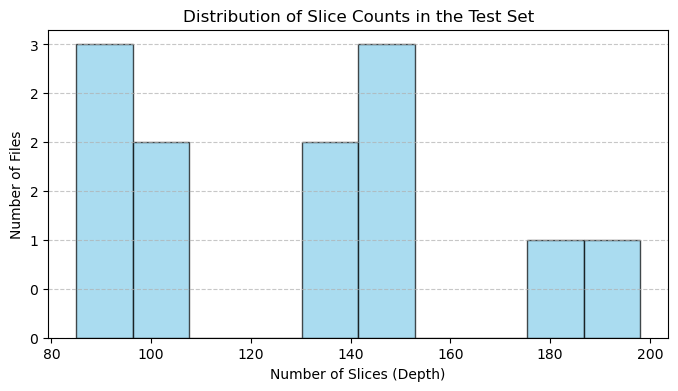

In [31]:
shapes_info = analyze_test_shapes(processed_test_dir)

In [9]:
file_path = os.path.join(processed_train_dir, "case0005_slice115.npz")

# Load file .npz
data = np.load(file_path)

# Lấy ảnh và nhãn từ file, mỗi key chứa một mảng numpy riêng
image = data["image"]
label = data["label"]

print("Image shape:", image.shape)
print("Label shape:", label.shape)


Image shape: (512, 512)
Label shape: (512, 512)


In [10]:
def display_training_sample(file_path):
    """
    Hiển thị ảnh training và ảnh label tương ứng từ file .npz.

    Parameters:
        file_path (str): Đường dẫn đến file .npz chứa ảnh và label.
    """
    # Load file .npz
    data = np.load(file_path)

    # Lấy ảnh và nhãn từ file
    image = data["image"]
    label = data["label"]

    # Kiểm tra kích thước
    print("Image shape:", image.shape)
    print("Label shape:", label.shape)

    # Hiển thị ảnh
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(image, cmap="gray")
    axes[0].set_title("Training Image")
    axes[0].axis("off")

    axes[1].imshow(label, cmap="jet", alpha=0.7)
    axes[1].set_title("Label Mask")
    axes[1].axis("off")

    plt.show()

Image shape: (512, 512)
Label shape: (512, 512)


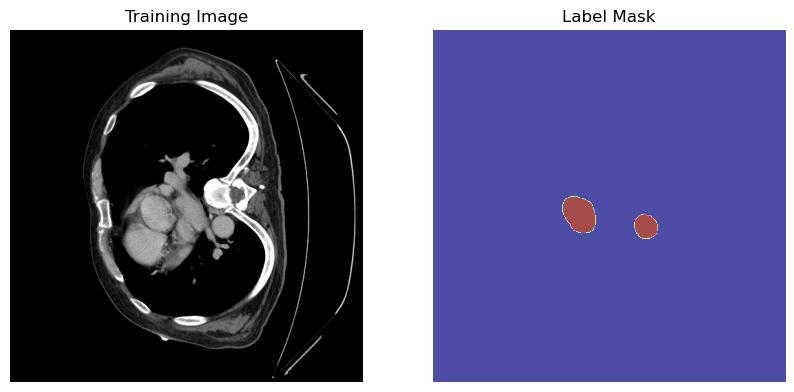

In [11]:
display_training_sample(file_path)

In [22]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

def display_volume(file_path, num_slices=20, n_cols=5):
    with h5py.File(file_path, 'r') as hf:
        image = hf['image'][:]  # (D, H, W)
        label = hf['label'][:] if 'label' in hf else np.zeros_like(image)

    D = image.shape[0]  # Số lát cắt (depth)

    # Chọn các lát cắt cách đều nhau
    slice_indices = np.linspace(0, D-1, num=num_slices, dtype=int)

    n_rows = int(np.ceil(num_slices / n_cols))  # Số hàng cần có
    fig, axes = plt.subplots(n_rows, n_cols * 2, figsize=(3 * n_cols, 3 * n_rows))

    for i, idx in enumerate(slice_indices):
        row, col = divmod(i, n_cols)  # Xác định vị trí trong lưới

        # Hiển thị ảnh gốc
        axes[row, col * 2].imshow(image[idx, :, :], cmap='gray')
        axes[row, col * 2].set_title(f"Image {idx}")
        axes[row, col * 2].axis('off')

        # Hiển thị nhãn
        axes[row, col * 2 + 1].imshow(label[idx, :, :], cmap="jet", alpha=0.7)
        axes[row, col * 2 + 1].set_title(f"Label {idx}")
        axes[row, col * 2 + 1].axis('off')

    # Ẩn các subplot trống nếu có
    for j in range(i + 1, n_rows * n_cols):
        axes.flat[j * 2].axis('off')
        axes.flat[j * 2 + 1].axis('off')

    plt.tight_layout()
    plt.show()


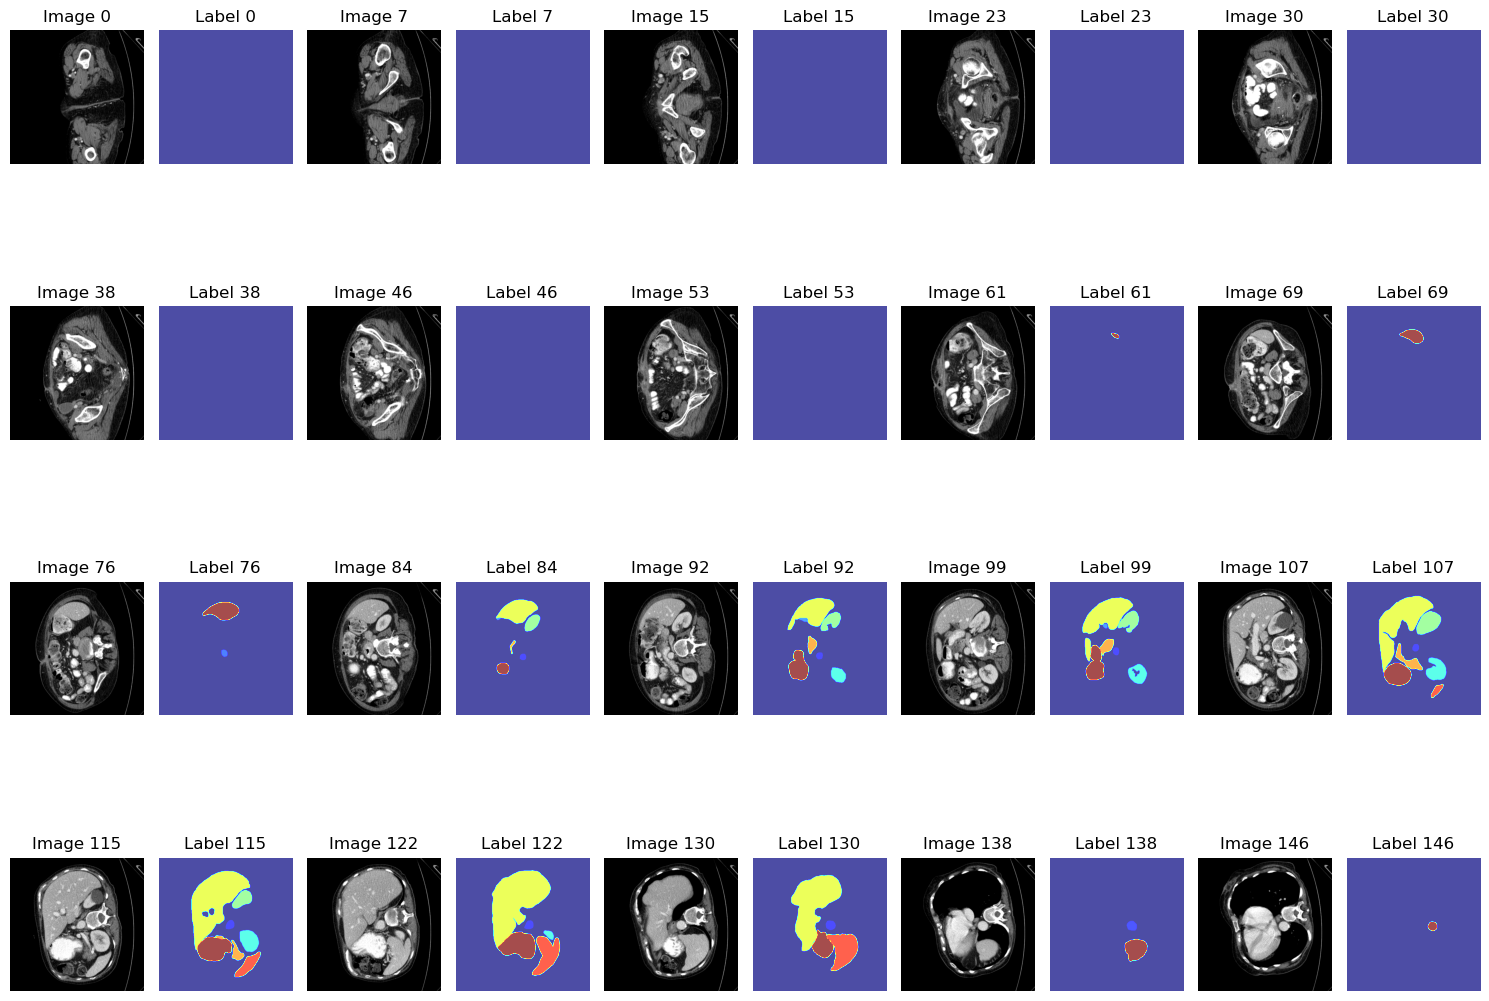

In [23]:
test_file_path = os.path.join(processed_test_dir, "case0001.npy.h5")
display_volume(test_file_path)